# Introduction to Quantitative Biology - Final Project
#### Group - ALEX 
#### Members - Alex Luna, Alex Dhupar, Alexis Guth
***

## Background Information
***

The goal of this project is to analyze data regarding current drugs and their ability to cross the blood brain barrier, with the eventual aim of creating an equation based on the analyzed data in order to generate a predictive model. This model will be based on drugs which have the ability to cross the Blood Brain Barrier (BBB), and their chemical and physical properties. This information will be used to generate a mathematical equation which will be able to graphically determine a drug's ability to cross the BBB based on chosen factors. 

The package rdkit was used to pull elements of interest out of the molecules provided, based on their SMILES formula, which is a computer friendly chemical formula for a molecule of interest. The elements of interest will be analyzed are: Lipophilicity (MolLogP), Molecular Weight (MolWt), Topological Polar Surface Area (TPSA), Formal Charge (FC), Aromatic Rings, and Heavy atoms. 

- These elements were chosen specifically for their impact on the ability for a drug to cross a membrane. Lipophilicity was chosen.....

These physiochemical elements will then be used to find any correlation between an element and the LogBB value, which is an experimental value given in the Data set. LogBB describes the concentration of a drug found on either side of the BBB, where a higher LogBB value equals a higher concentration of drug found on the inside of the BBB. 

The data set used in this Project was sourced from GitHub, and includes data of ~7000 drugs and their ability to cross the BBB. The specific data set used in the following data analysis is comprised of only ~1000 drugs, as this specific set contains the LogBB values. 
‌

#### References
[1] F. Meng, Y. Xi, J. Huang, and P. W. Ayers, “A curated diverse molecular database of blood-brain barrier permeability with chemical descriptors,” Scientific Data, vol. 8, no. 1, p. 289, Oct. 2021, doi: https://doi.org/10.1038/s41597-021-01069-5.

## Data Preparation and Feature Extraction
***

In [1]:
# import required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors

In [2]:
def ecdf(data):
    """Generate x and y values for plotting an ECDF."""
    x_vals = np.sort(data)
    y_vals = np.arange(1, len(data)+1) / len(data)

    return x_vals, y_vals

In [3]:
# data file name for BBB dataset with logBB values
bbb_reg = "../B3DB/B3DB_regression.tsv"

# load data
df_regression = pd.read_csv(bbb_reg, sep="\t")

In [28]:
df_regression.head()

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,Inchi,reference,group,comments
0,1,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)(NC(=O)C(C4=CC=C...,3889.0|,-2.52,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,R25|,A,NaN
1,2,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC6[C@...,18595497.0|,-2.15,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,R25|,A,NaN
2,3,morphine-6-glucuronide,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-9-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,9847115.0|,-2.09,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-5-13(31-2...,R25|,A,NaN
3,4,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,CC1=NC=C(C=C1)CC2CNC(NC2=O)NCCCCC3=NC=C(C=C3C)Br,74041479.0|,-1.88,InChI=1S/C21H28BrN5O/c1-14-9-18(22)13-25-19(14...,R35|,A,NaN
4,5,NaN,NaN,c1(c2c3n(c4c(C(N(C)C3)=O)c(Cl)ccc4)cn2)noc(C(O...,nan|,-1.82,"InChI=1S/C16H14ClN5O4/c1-16(24,25)15-19-13(20-...",R35|,A,NaN


In [5]:
# remove any variables that do not have a compound name
df_main = df_regression[(df_regression['compound_name'].notna())].copy()

# parse through molecular structures and prepare for structure analysis
df_main['Mol'] = df_main['SMILES'].apply(Chem.MolFromSmiles)

# based on molecular structures, add new columns containing elements of interest
df_main['MolLogP'] = df_main['Mol'].apply(Descriptors.MolLogP)
df_main['MolWt'] = df_main['Mol'].apply(Descriptors.MolWt)
df_main['TPSA'] = df_main['Mol'].apply(Descriptors.TPSA)
df_main['FC']    = df_main['Mol'].apply(lambda m: Chem.GetFormalCharge(m))
df_main['Aromatic Rings'] = df_main['Mol'].apply(Descriptors.NumAromaticRings)
df_main['Heavy Atoms'] = df_main['Mol'].apply(Descriptors.HeavyAtomCount)


In [6]:
# ensure data frame only consists of elements of interest
df_main = df_main[['NO.', 'compound_name', 'logBB', 'MolLogP', 'MolWt',
                   'TPSA', 'FC', 'Aromatic Rings', 'Heavy Atoms']]
df_main.head()

,NO.,compound_name,logBB,MolLogP,MolWt,TPSA,FC,Aromatic Rings,Heavy Atoms
0,1,moxalactam,-2.52,-1.12770,520.480,206.30,0,2,36
1,2,schembl614298,-2.15,-1.23650,461.467,149.15,0,1,33
2,3,morphine-6-glucuronide,-2.09,-0.88540,461.467,149.15,0,1,33
3,4,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,-1.88,2.63014,446.393,78.94,0,2,28
6,7,sucrose,-1.70,-5.39560,342.297,189.53,0,0,23


## Exploratory Data Analysis
***

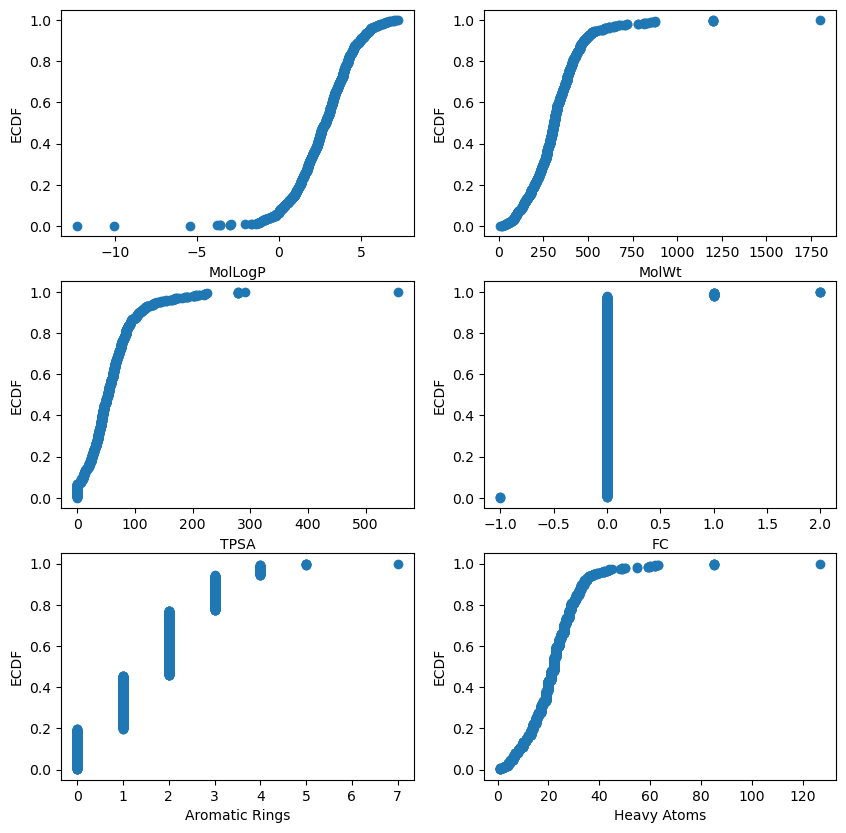

In [7]:
# initialize list of elements and plotting setup
elements = ['MolLogP', 'MolWt', 'TPSA', 'FC', 'Aromatic Rings', 'Heavy Atoms']
fig, axes = plt.subplots(3,2, figsize = (10,10))
axes = axes.flatten()

# loop through elements
for i,elm in enumerate(elements):

    # plotting our data
    x_data, y_data = ecdf(df_main[elm])
    axes[i].scatter(x_data, y_data)
    axes[i].set_xlabel(elm)
    axes[i].set_ylabel('ECDF');

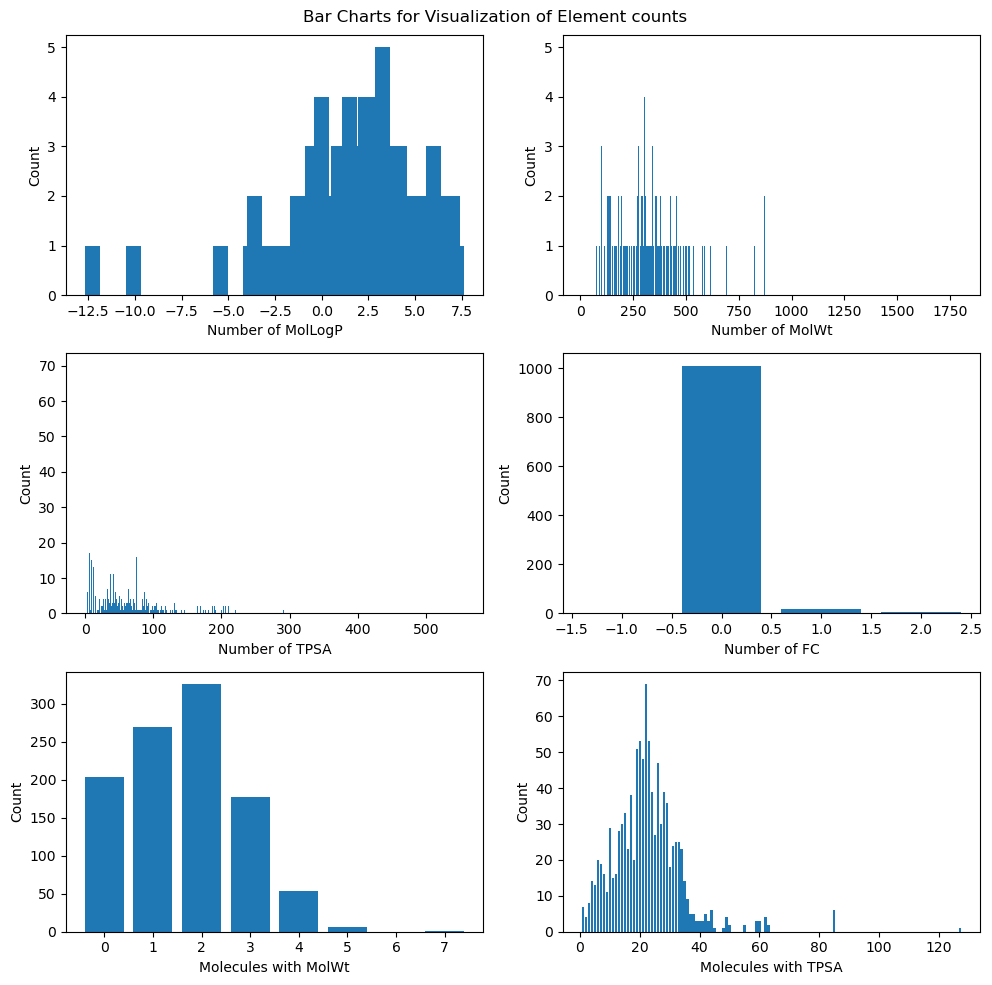

In [8]:
# initialize list of elements and plotting setup
elements = ['MolLogP', 'MolWt', 'TPSA', 'FC', 'Aromatic Rings', 'Heavy Atoms']
fig, axes = plt.subplots(3,2, figsize = (10,10))
axes = axes.flatten()

# loop through elements
for i, elm in enumerate(elements):

    # separate data of element into bins
    bins = df_main[elm].unique().tolist()
    bins.sort()

    # develop count for each bin
    count = []
    for b in bins:
        count.append((df_main[elm] == b).sum())

    # plot data
    axes[i].bar(bins, count)
    axes[i].set_xlabel(f'Number of {elm}')
    axes[i].set_ylabel('Count')

# title graph and ensure proper spacing
axes[4].set_xlabel('Molecules with MolWt')
axes[5].set_xlabel('Molecules with TPSA')

fig.suptitle('Bar Charts for Visualization of Element counts')
plt.tight_layout();

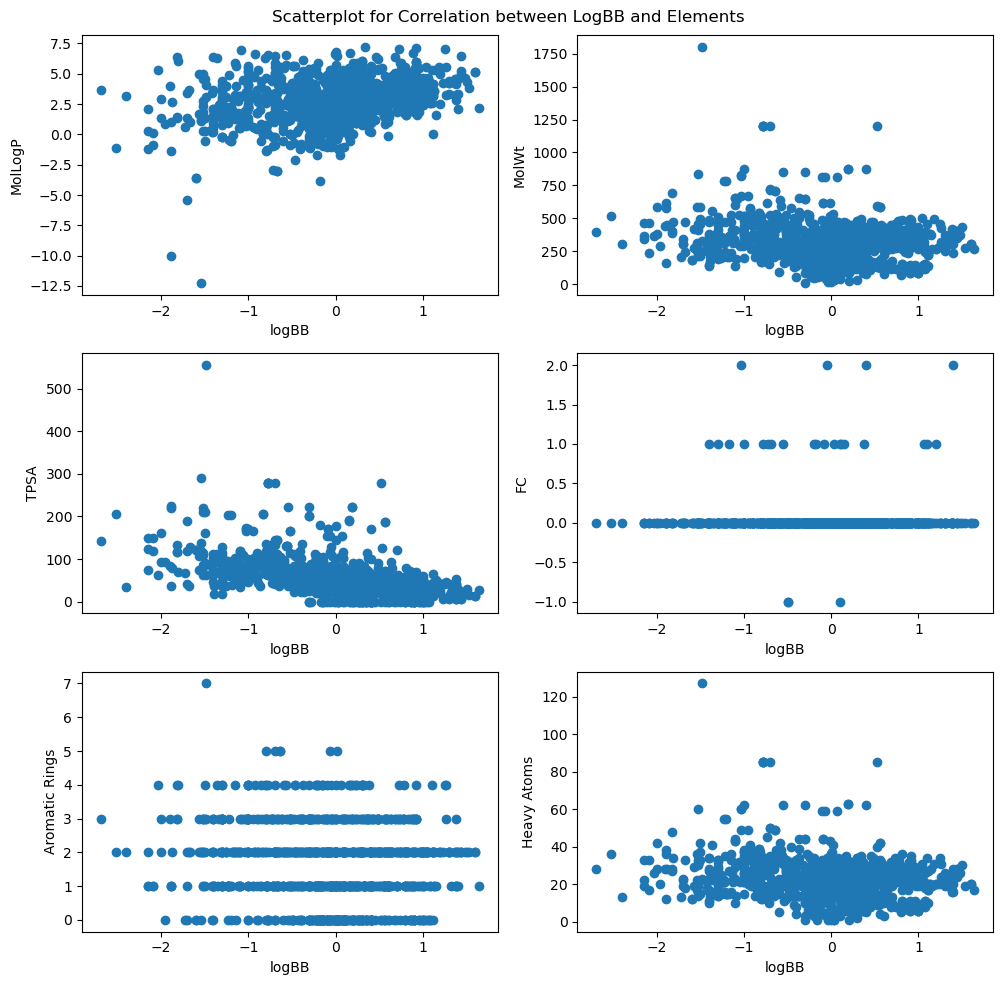

In [9]:
# initialize list of elements and plotting setup
elements = ['MolLogP', 'MolWt', 'TPSA', 'FC', 'Aromatic Rings', 'Heavy Atoms']
fig, axes = plt.subplots(3,2, figsize = (10,10))
axes = axes.flatten()

# loop through elements
for i,elm in enumerate(elements):

    # plot data
    axes[i].scatter(df_main['logBB'], df_main[elm])
    axes[i].set_xlabel('logBB')
    axes[i].set_ylabel(elm)    


# title graph and ensure proper spacing
fig.suptitle('Scatterplot for Correlation between LogBB and Elements')
plt.tight_layout();

In [10]:
# make a list of elements
elements = ['logBB', 'MolLogP', 'MolWt', 'TPSA', 'FC', 'Aromatic Rings', 'Heavy Atoms']

# make a correlation table between all chosen elements
corr_table = df_main[elements].corr()

# format table to include a gradient
corr_table.style.background_gradient(cmap='coolwarm') \
                 .format("{:.2f}")


,logBB,MolLogP,MolWt,TPSA,FC,Aromatic Rings,Heavy Atoms
logBB,1.00,0.28,-0.21,-0.53,0.00,-0.10,-0.21
MolLogP,0.28,1.00,0.41,-0.24,-0.11,0.53,0.41
MolWt,-0.21,0.41,1.00,0.69,0.02,0.51,0.99
TPSA,-0.53,-0.24,0.69,1.00,0.02,0.19,0.70
FC,0.00,-0.11,0.02,0.02,1.00,0.03,0.02
Aromatic Rings,-0.10,0.53,0.51,0.19,0.03,1.00,0.54
Heavy Atoms,-0.21,0.41,0.99,0.70,0.02,0.54,1.00


## Regression Modeling
***

#### Simple Linear Regression

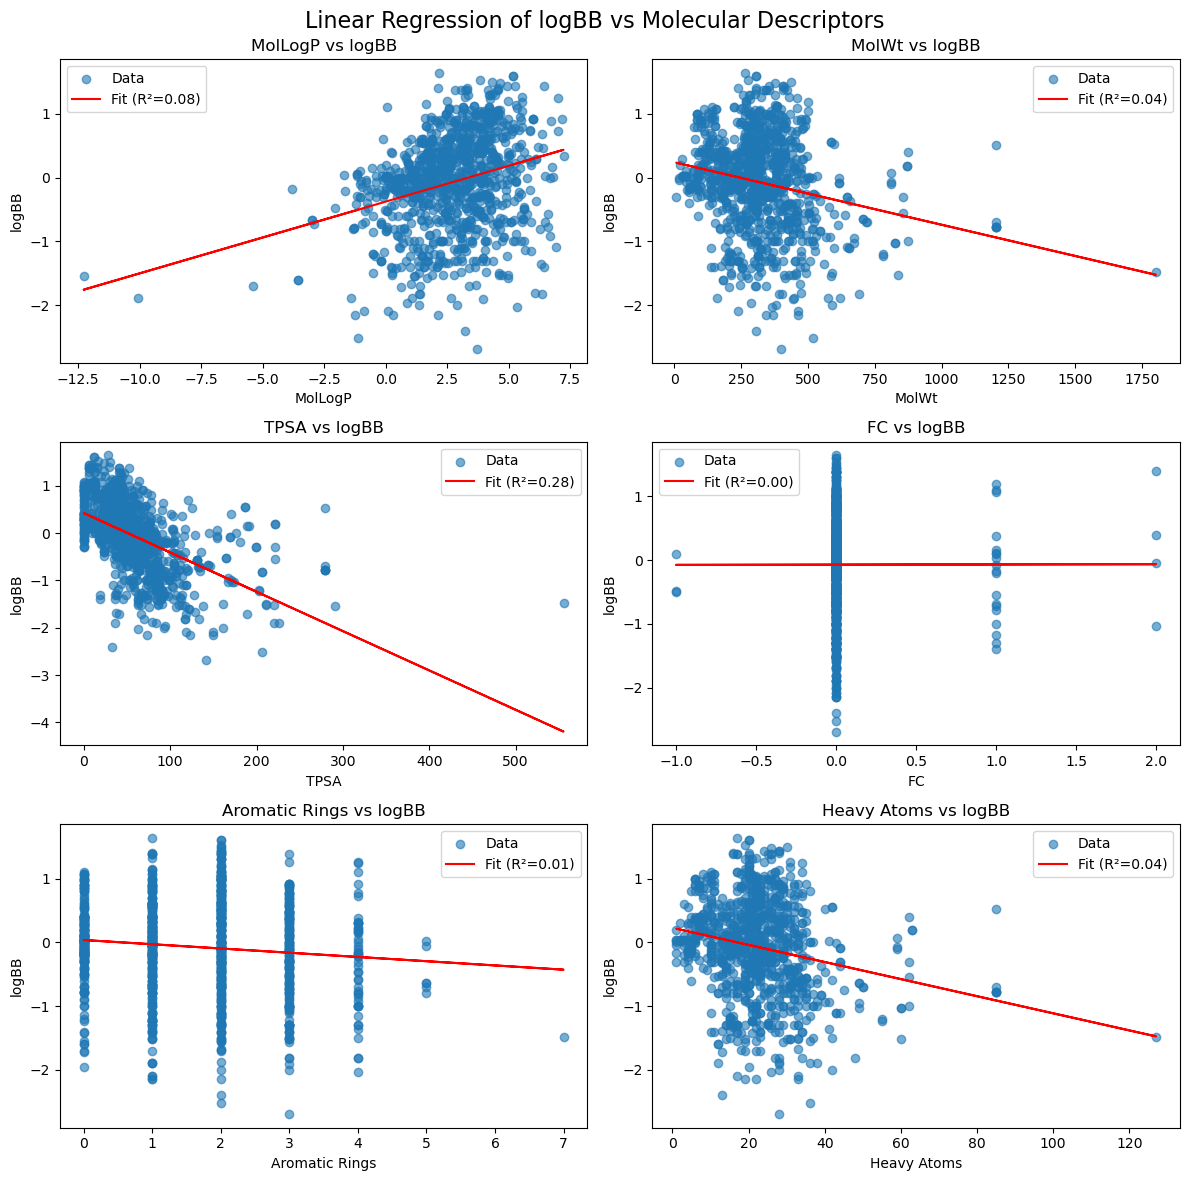

In [11]:
# import additional packages
from scipy.stats import linregress

elements = ['MolLogP', 'MolWt', 'TPSA', 'FC', 'Aromatic Rings', 'Heavy Atoms']

# set up subplot grid
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# loop through descriptors
for i, elm in enumerate(elements):
    x = df_main[elm]
    y = df_main['logBB']
    
    # perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # scatter plot
    axes[i].scatter(x, y, alpha=0.6, label='Data')
    
    # regression line
    axes[i].plot(x, intercept + slope*x, color='red', label=f'Fit (R²={r_value**2:.2f})')
    
    # labels and title
    axes[i].set_xlabel(elm)
    axes[i].set_ylabel('logBB')
    axes[i].set_title(f'{elm} vs logBB')
    axes[i].legend()

# overall title and layout
fig.suptitle('Linear Regression of logBB vs Molecular Descriptors', fontsize=16)
plt.tight_layout()
plt.show()

#### Multiple Linear Regression

In [12]:
# select features and target
X = df_main[['MolLogP', 'MolWt', 'TPSA', 'FC', 'Aromatic Rings', 'Heavy Atoms']].values
y = df_main['logBB'].values

# add intercept column
X_aug = np.column_stack((np.ones(X.shape[0]), X))

# solve using least squares
coeffs, residuals, rank, s = np.linalg.lstsq(X_aug, y, rcond=None)

# print coefficients
print("Intercept:", coeffs[0])
for i, name in enumerate(['MolLogP', 'MolWt', 'TPSA', 'FC', 'Aromatic Rings', 'Heavy Atoms']):
    print(f"{name}: {coeffs[i+1]:.4f}")

Intercept: 0.24220011257920737
MolLogP: 0.0052
MolWt: -0.0012
TPSA: -0.0127
FC: 0.0553
Aromatic Rings: -0.1340
Heavy Atoms: 0.0464


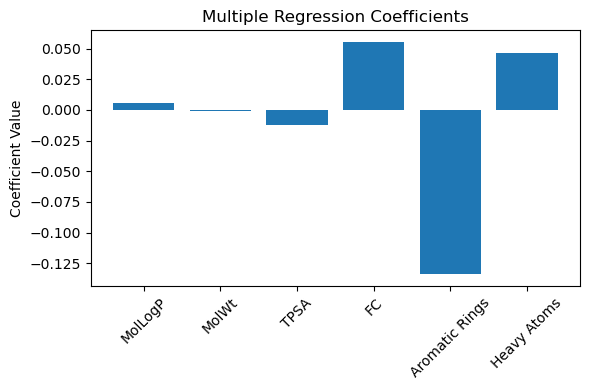

In [13]:
feature_names = ['MolLogP', 'MolWt', 'TPSA', 'FC', 'Aromatic Rings', 'Heavy Atoms']
coef_values = coeffs[1:]  # skip intercept

# plot regression coefficients to show which descriptors matter most
plt.figure(figsize=(6,4))
plt.bar(feature_names, coef_values)
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Multiple Regression Coefficients')
plt.tight_layout()
plt.show()

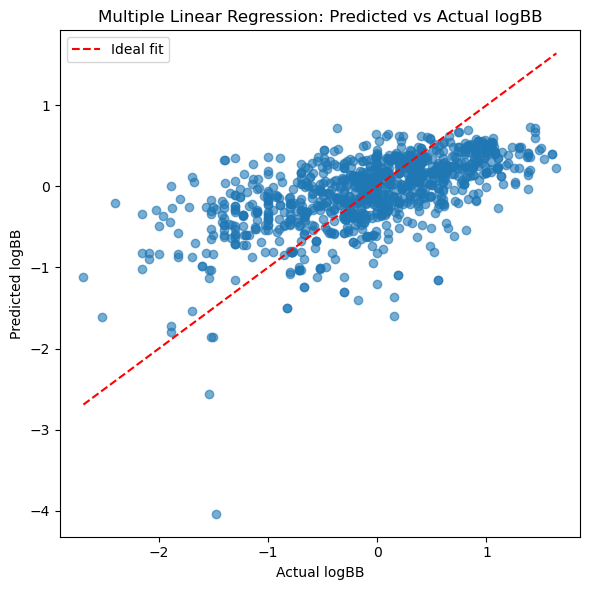

In [14]:
# predicted values
y_pred = X_aug @ coeffs

# plot predicted vs actual
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal fit')
plt.xlabel('Actual logBB')
plt.ylabel('Predicted logBB')
plt.title('Multiple Linear Regression: Predicted vs Actual logBB')
plt.legend()
plt.tight_layout()
plt.show()

## Classification Modeling
***

Accuracy: 0.6293436293436293
Confusion Matrix:
 [[532  12]
 [372 120]]


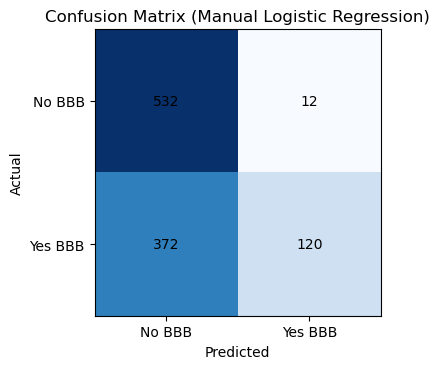

In [15]:
# prepare features and binary target
X = df_main[['MolLogP', 'MolWt', 'TPSA', 'FC', 'Aromatic Rings', 'Heavy Atoms']].values
y = (df_main['logBB'] > 0).astype(int).values   # 1 if penetrates BBB, else 0

# add intercept column
X_aug = np.column_stack((np.ones(X.shape[0]), X))

# define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# gradient descent for logistic regression
def logistic_regression(X, y, lr=0.001, epochs=10000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)

    for _ in range(epochs):
        linear_model = np.dot(X, weights)
        y_pred = sigmoid(linear_model)

        # gradient
        gradient = np.dot(X.T, (y_pred - y)) / n_samples
        weights -= lr * gradient

    return weights

# train model
weights = logistic_regression(X_aug, y, lr=0.001, epochs=5000)

# predictions
y_pred_prob = sigmoid(np.dot(X_aug, weights))
y_pred_class = (y_pred_prob >= 0.5).astype(int)

# accuracy
accuracy = (y_pred_class == y).mean()
print("Accuracy:", accuracy)

# create confusion matrix, which breaks down correct vs. incorrect predictions
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp],[fn, tp]])

cm = confusion_matrix(y, y_pred_class)
print("Confusion Matrix:\n", cm)

# visualize confusion matrix
fig, ax = plt.subplots(figsize=(4,4))
im = ax.imshow(cm, cmap='Blues')

ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['No BBB', 'Yes BBB'])
ax.set_yticklabels(['No BBB', 'Yes BBB'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Manual Logistic Regression)')

# annotate counts
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

## Model Comparison and Interpretation
***

## Simulation Extension
***

In [26]:
# Create synthetic data with a 'Drug Name' column for demonstration
np.random.seed(42)
n_samples = 150
data = pd.DataFrame({
    'Drug Name': [f'Drug_{i+1}' for i in range(n_samples)],
    'MolLogP': np.random.uniform(0, 5, n_samples),
    'MolWt': np.random.uniform(150, 600, n_samples),
    'TPSA': np.random.uniform(0, 150, n_samples),
    'NumHDonors': np.random.randint(0, 5, n_samples),
    'NumHAcceptors': np.random.randint(0, 8, n_samples),
    # Calculate LogBB based on features to simulate a real relationship
    'LogBB': 0.5 + 0.2*np.random.randn(n_samples) + 
             0.05 * np.array([1 if x>3 else -1 for x in np.random.uniform(0, 5, n_samples)]) +
             0.003 * np.array([1 if x<50 else -1 for x in np.random.uniform(0, 150, n_samples)])
})
data = data.set_index('Drug Name') # Set Drug Name as the index for easy lookup

# Define the features for the OLS model
FEATURES = ['MolLogP', 'MolWt', 'TPSA', 'NumHDonors', 'NumHAcceptors']
y = data['LogBB'].values.reshape(-1, 1) # Target vector (LogBB)
X_features = data[FEATURES].values      # Feature matrix

# Crucial Step: Add a column of ones for the intercept (β₀) to the feature matrix X
# X_full is the design matrix
X_full = np.hstack([np.ones((X_features.shape[0], 1)), X_features])

# Calculate the OLS Coefficient Vector (beta) using the matrix formula: beta = (X^T X)^-1 X^T y
# 1. (X^T @ X): Transpose of X multiplied by X
XTX = X_full.T @ X_full
# 2. Inverse of XTX
XTX_inv = np.linalg.inv(XTX)
# 3. Final calculation: XTX_inv @ X^T @ y
BETA_VECTOR = XTX_inv @ X_full.T @ y

# Store the coefficients for interpretation and prediction
COEFFICIENT_NAMES = ['Intercept'] + FEATURES
COEFFICIENTS = dict(zip(COEFFICIENT_NAMES, BETA_VECTOR.flatten()))

print(f"--- Model Training Complete (NumPy OLS) ---")
print("Coefficients:")
for name, value in COEFFICIENTS.items():
    print(f"  {name}: {value:.4f}")
print("-------------------------------------------")


#Prediction Function
def predict_logbb_by_name(drug_name, data_df, features_list, coefficients):
    """
    Looks up a drug's properties and predicts its LogBB using the NumPy OLS coefficients.
    """
    try:
        # 1. Locate the feature data for the given drug name
        # .loc retrieves the features as a pandas Series
        drug_features_series = data_df.loc[drug_name, features_list]
        
        # 2. Create the prediction vector: [1, MolLogP, MolWt, TPSA, ...]
        # The '1' is required for the intercept (β₀)
        X_predict_vector = np.array([1.0] + drug_features_series.tolist())
        
        # 3. Create the coefficient vector in the correct order
        beta_vector = np.array([coefficients[name] for name in ['Intercept'] + features_list])
        
        # 4. Calculate the prediction (Dot Product: X_predict_vector @ beta_vector)
        predicted_logbb = X_predict_vector @ beta_vector
        
        # 5. Format the output
        print(f"\n--- Prediction for {drug_name} ---")
        print("Input Properties:")
        print(drug_features_series.to_string())
        print(f"\nPredicted LogBB Value: {predicted_logbb:.4f}")
        
    except KeyError:
        print(f"\nERROR: Drug '{drug_name}' not found in the dataset.")
    except Exception as e:
        print(f"\nAn unexpected error occurred: {e}")

# Test 1: Predict for a drug that IS in the dataset
predict_logbb_by_name(
    drug_name='Drug_15', 
    data_df=data, 
    features_list=FEATURES,
    coefficients=COEFFICIENTS
)

# Test 2: Predict for a drug that is NOT in the dataset
predict_logbb_by_name(
    drug_name='New_Experimental_Compound_X', 
    data_df=data, 
    features_list=FEATURES,
    coefficients=COEFFICIENTS
)

--- Model Training Complete (NumPy OLS) ---
Coefficients:
  Intercept: 0.4315
  MolLogP: 0.0171
  MolWt: -0.0001
  TPSA: 0.0005
  NumHDonors: -0.0134
  NumHAcceptors: 0.0152
-------------------------------------------

--- Prediction for Drug_15 ---
Input Properties:
MolLogP            0.909125
MolWt            190.630397
TPSA             125.397018
NumHDonors         4.000000
NumHAcceptors      7.000000

Predicted LogBB Value: 0.5388

ERROR: Drug 'New_Experimental_Compound_X' not found in the dataset.


## Results and Discussion
***

## Next Steps 
***